In [18]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
#import data set, dataset was downloaded from Kaggle:https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale
df=pd.read_csv("ExportSales.csv")
df.head(2)

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price,Destination full name
0,2529604,28.04.2019,Category5,267,30011006,612,IRQ,750,3334.8225,Iraq
1,2529605,29.04.2019,Category5,302,30011006,514,BHR,400,3032.8240,Bahrain


In [3]:
#Filter data for regression
df_reg=df[["QTY","Total Price"]]

In [4]:
#Checking if we have missing data
df_reg.isnull().sum()

QTY            0
Total Price    0
dtype: int64

In [21]:
#Define a size
plt.rcParams["figure.figsize"] = (12, 8)

In [13]:
# Convert columns to tensors
x = torch.tensor(df['QTY'].values, dtype=torch.float32).unsqueeze(1)
y = torch.tensor(df['Total Price'].values, dtype=torch.float32).unsqueeze(1)

In [11]:
#CHeck tensor shape
print(x.shape)
print(y.shape)

torch.Size([7811])
torch.Size([7811])


In [15]:
# Define simple linear regression model
model = nn.Linear(1, 1)
loss_fn = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [16]:
# Train model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/1000], Loss: 3168.6594
Epoch [101/1000], Loss: 1399.6865
Epoch [201/1000], Loss: 1399.4979
Epoch [301/1000], Loss: 1399.3105
Epoch [401/1000], Loss: 1399.1240
Epoch [501/1000], Loss: 1398.9705
Epoch [601/1000], Loss: 1398.7765
Epoch [701/1000], Loss: 1398.5980
Epoch [801/1000], Loss: 1398.4202
Epoch [901/1000], Loss: 1398.2443


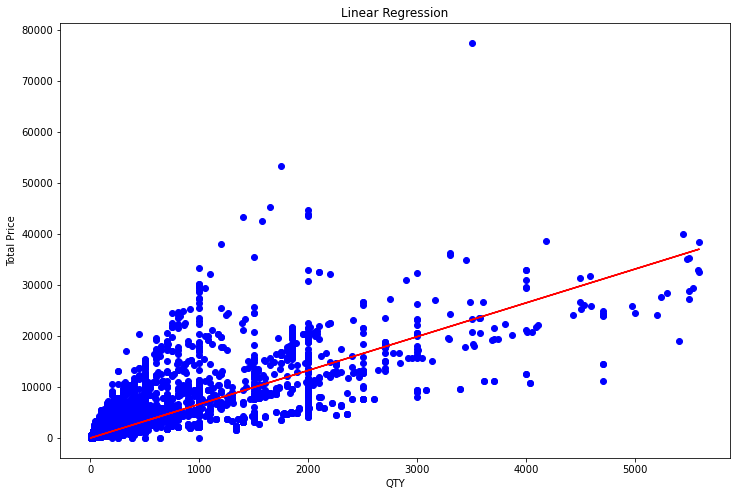

In [22]:
# Plot regression line
plt.scatter(x.numpy(), y.numpy(), color='blue')
plt.plot(x.numpy(), model(x).detach().numpy(), color='red')
plt.title('Linear Regression')
plt.xlabel('QTY')
plt.ylabel('Total Price')
plt.show()

In [20]:
#Lets check final MAE value
y_pred = model(x)
mae = loss_fn(y_pred, y)
print(f'Mean Absolute Error: {mae.item():.4f}')

Mean Absolute Error: 1398.0662


In [24]:
# Define make it a bit complicated, create a  linear regression model with two hidden layers
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)
loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [25]:
# Train model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/1000], Loss: 3044.2034
Epoch [101/1000], Loss: 1391.8340
Epoch [201/1000], Loss: 1380.7620
Epoch [301/1000], Loss: 1371.3557
Epoch [401/1000], Loss: 1366.8801
Epoch [501/1000], Loss: 1365.8257
Epoch [601/1000], Loss: 1365.6315
Epoch [701/1000], Loss: 1365.6195
Epoch [801/1000], Loss: 1365.6156
Epoch [901/1000], Loss: 1365.6156


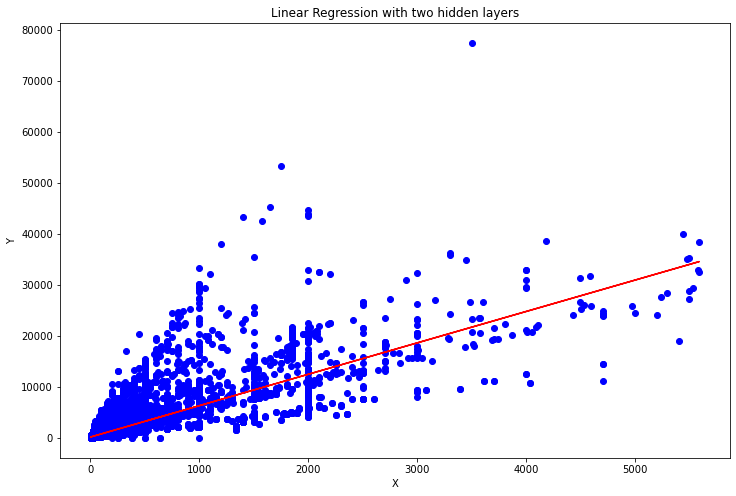

In [26]:
# Plot regression line
plt.scatter(x.numpy(), y.numpy(), color='blue')
plt.plot(x.numpy(), model(x).detach().numpy(), color='red')
plt.title('Linear Regression with two hidden layers')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [27]:
# Lets measure MAE, is a better that model without hidden layers
y_pred = model(x)
mae = loss_fn(y_pred, y)
print(f'Mean Absolute Error: {mae.item():.4f}')

Mean Absolute Error: 1365.6156


In [34]:
# Define linear regression model with 4 hidden layers
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.ReLU(),
    nn.Linear(32, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)
loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [35]:
# Train model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/1000], Loss: 3081.0752
Epoch [101/1000], Loss: 1384.7203
Epoch [201/1000], Loss: 1362.6953
Epoch [301/1000], Loss: 1348.5988
Epoch [401/1000], Loss: 1339.2588
Epoch [501/1000], Loss: 1333.5173
Epoch [601/1000], Loss: 1338.9131
Epoch [701/1000], Loss: 1330.7749
Epoch [801/1000], Loss: 1329.3643
Epoch [901/1000], Loss: 1346.6431


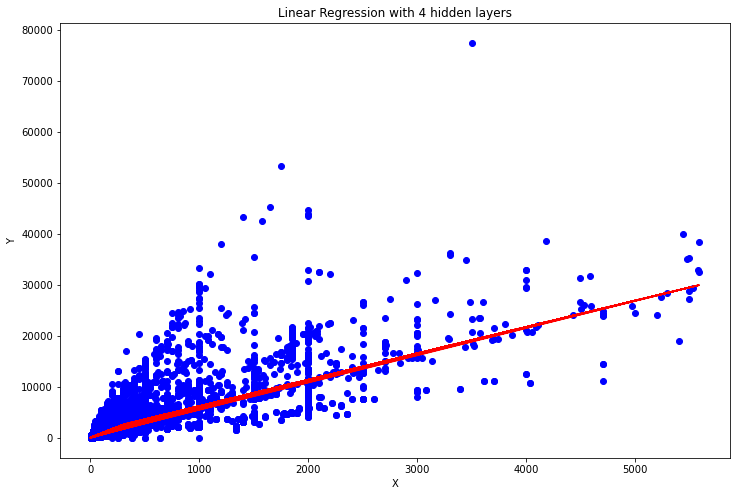

In [36]:
# Plot regression line
plt.scatter(x.numpy(), y.numpy(), color='blue')
plt.plot(x.numpy(), model(x).detach().numpy(), color='red')
plt.title('Linear Regression with 4 hidden layers')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [37]:
# Compute mean absolute error, so far the best MAE for predicted values
y_pred = model(x)
mae = loss_fn(y_pred, y)
print(f'Mean Absolute Error: {mae.item():.4f}')

Mean Absolute Error: 1329.1377


In [39]:
# Define linear regression model with tanh activation function
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.Tanh(),
    nn.Linear(32, 16),
    nn.Tanh(),
    nn.Linear(16, 1)
)
loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [40]:
# Train model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/1000], Loss: 3060.5366
Epoch [101/1000], Loss: 3042.2295
Epoch [201/1000], Loss: 3025.7903
Epoch [301/1000], Loss: 3009.7983
Epoch [401/1000], Loss: 2994.2666
Epoch [501/1000], Loss: 2979.0479
Epoch [601/1000], Loss: 2964.1455
Epoch [701/1000], Loss: 2949.6138
Epoch [801/1000], Loss: 2935.4539
Epoch [901/1000], Loss: 2921.7500


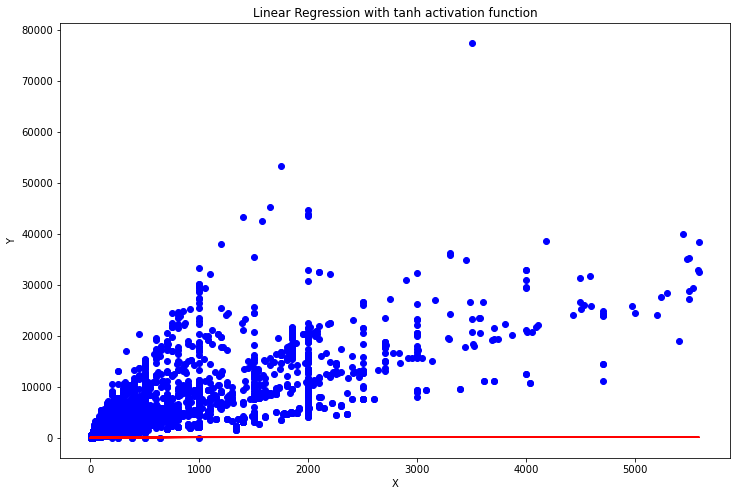

In [42]:
# Plot regression line
plt.scatter(x.numpy(), y.numpy(), color='blue')
plt.plot(x.numpy(), model(x).detach().numpy(), color='red')
plt.title('Linear Regression with tanh activation function')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [43]:
# Compute mean absolute error, so far the worst MAE value
y_pred = model(x)
mae = loss_fn(y_pred, y)
print(f'Mean Absolute Error: {mae.item():.4f}')

Mean Absolute Error: 2908.5110


In [29]:
# Define linear regression model with multiple hidden layers and dropout regularization
model = nn.Sequential(
    nn.Linear(1, 64),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(16, 1)
)
loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [30]:
# Train model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/1000], Loss: 3063.1514
Epoch [101/1000], Loss: 1558.0304
Epoch [201/1000], Loss: 1512.9683
Epoch [301/1000], Loss: 1500.6744
Epoch [401/1000], Loss: 1497.4135
Epoch [501/1000], Loss: 1489.0835
Epoch [601/1000], Loss: 1505.5249
Epoch [701/1000], Loss: 1497.0140
Epoch [801/1000], Loss: 1491.4866
Epoch [901/1000], Loss: 1496.9457


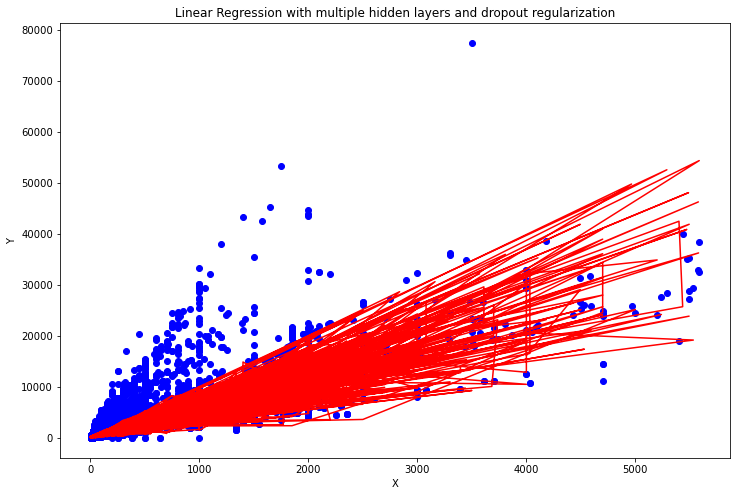

In [32]:
# Plot regression line multiple hidden layers and dropout regularization
plt.scatter(x.numpy(), y.numpy(), color='blue')
plt.plot(x.numpy(), model(x).detach().numpy(), color='red')
plt.title('Linear Regression with multiple hidden layers and dropout regularization')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [33]:
# Lets see MAE, in this case is bigger than in previous model
y_pred = model(x)
mae = loss_fn(y_pred, y)
print(f'Mean Absolute Error: {mae.item():.4f}')

Mean Absolute Error: 1498.1879
